In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [2]:
import os

In [3]:
os.getcwd()

'C:\\Users\\RAVIKIRAN'

In [4]:
cd/Users/RAVIKIRAN/archive (2)/Train

C:\Users\RAVIKIRAN\archive (2)\Train


In [5]:
os.getcwd()

'C:\\Users\\RAVIKIRAN\\archive (2)\\Train'

In [6]:
# loading dataset
data = []
labels = []
classes = 43
cur_path = os.getcwd()

for i in os.listdir(cur_path):
    dir = cur_path + '/' + i
    for j in os.listdir(dir):
        img_path = dir+'/'+j
        img = cv2.imread(img_path,-1)
        img = cv2.resize(img, (30,30), interpolation = cv2.INTER_NEAREST)
        data.append(img)
        labels.append(i)
        
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [7]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [8]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [9]:
train_data=pd.read_csv('C:\\Users\\RAVIKIRAN\\archive (2)\\Train.csv',usecols=['ClassId','Path','Width','Height'],)
test_data=pd.read_csv('C:\\Users\\RAVIKIRAN\\archive (2)\\Test.csv',usecols=['ClassId','Path','Width','Height'],)

train_data.rename({'ClassId':'label','Path':'path'},inplace=True,axis=1)
test_data.rename({'ClassId':'label','Path':'path'},inplace=True,axis=1)

train_data.head()

,Width,Height,label,path
0,27,26,20,Train/20/00020_00000_00000.png
1,28,27,20,Train/20/00020_00000_00001.png
2,29,26,20,Train/20/00020_00000_00002.png
3,28,27,20,Train/20/00020_00000_00003.png
4,28,26,20,Train/20/00020_00000_00004.png


In [10]:
test_data.head()

,Width,Height,label,path
0,53,54,16,Test/00000.png
1,42,45,1,Test/00001.png
2,48,52,38,Test/00002.png
3,27,29,33,Test/00003.png
4,60,57,11,Test/00004.png


In [11]:
print('NO. of classes')
print(train_data['label'].nunique())

NO. of classes
43


In [12]:
cd/Users/RAVIKIRAN/archive (2)

C:\Users\RAVIKIRAN\archive (2)


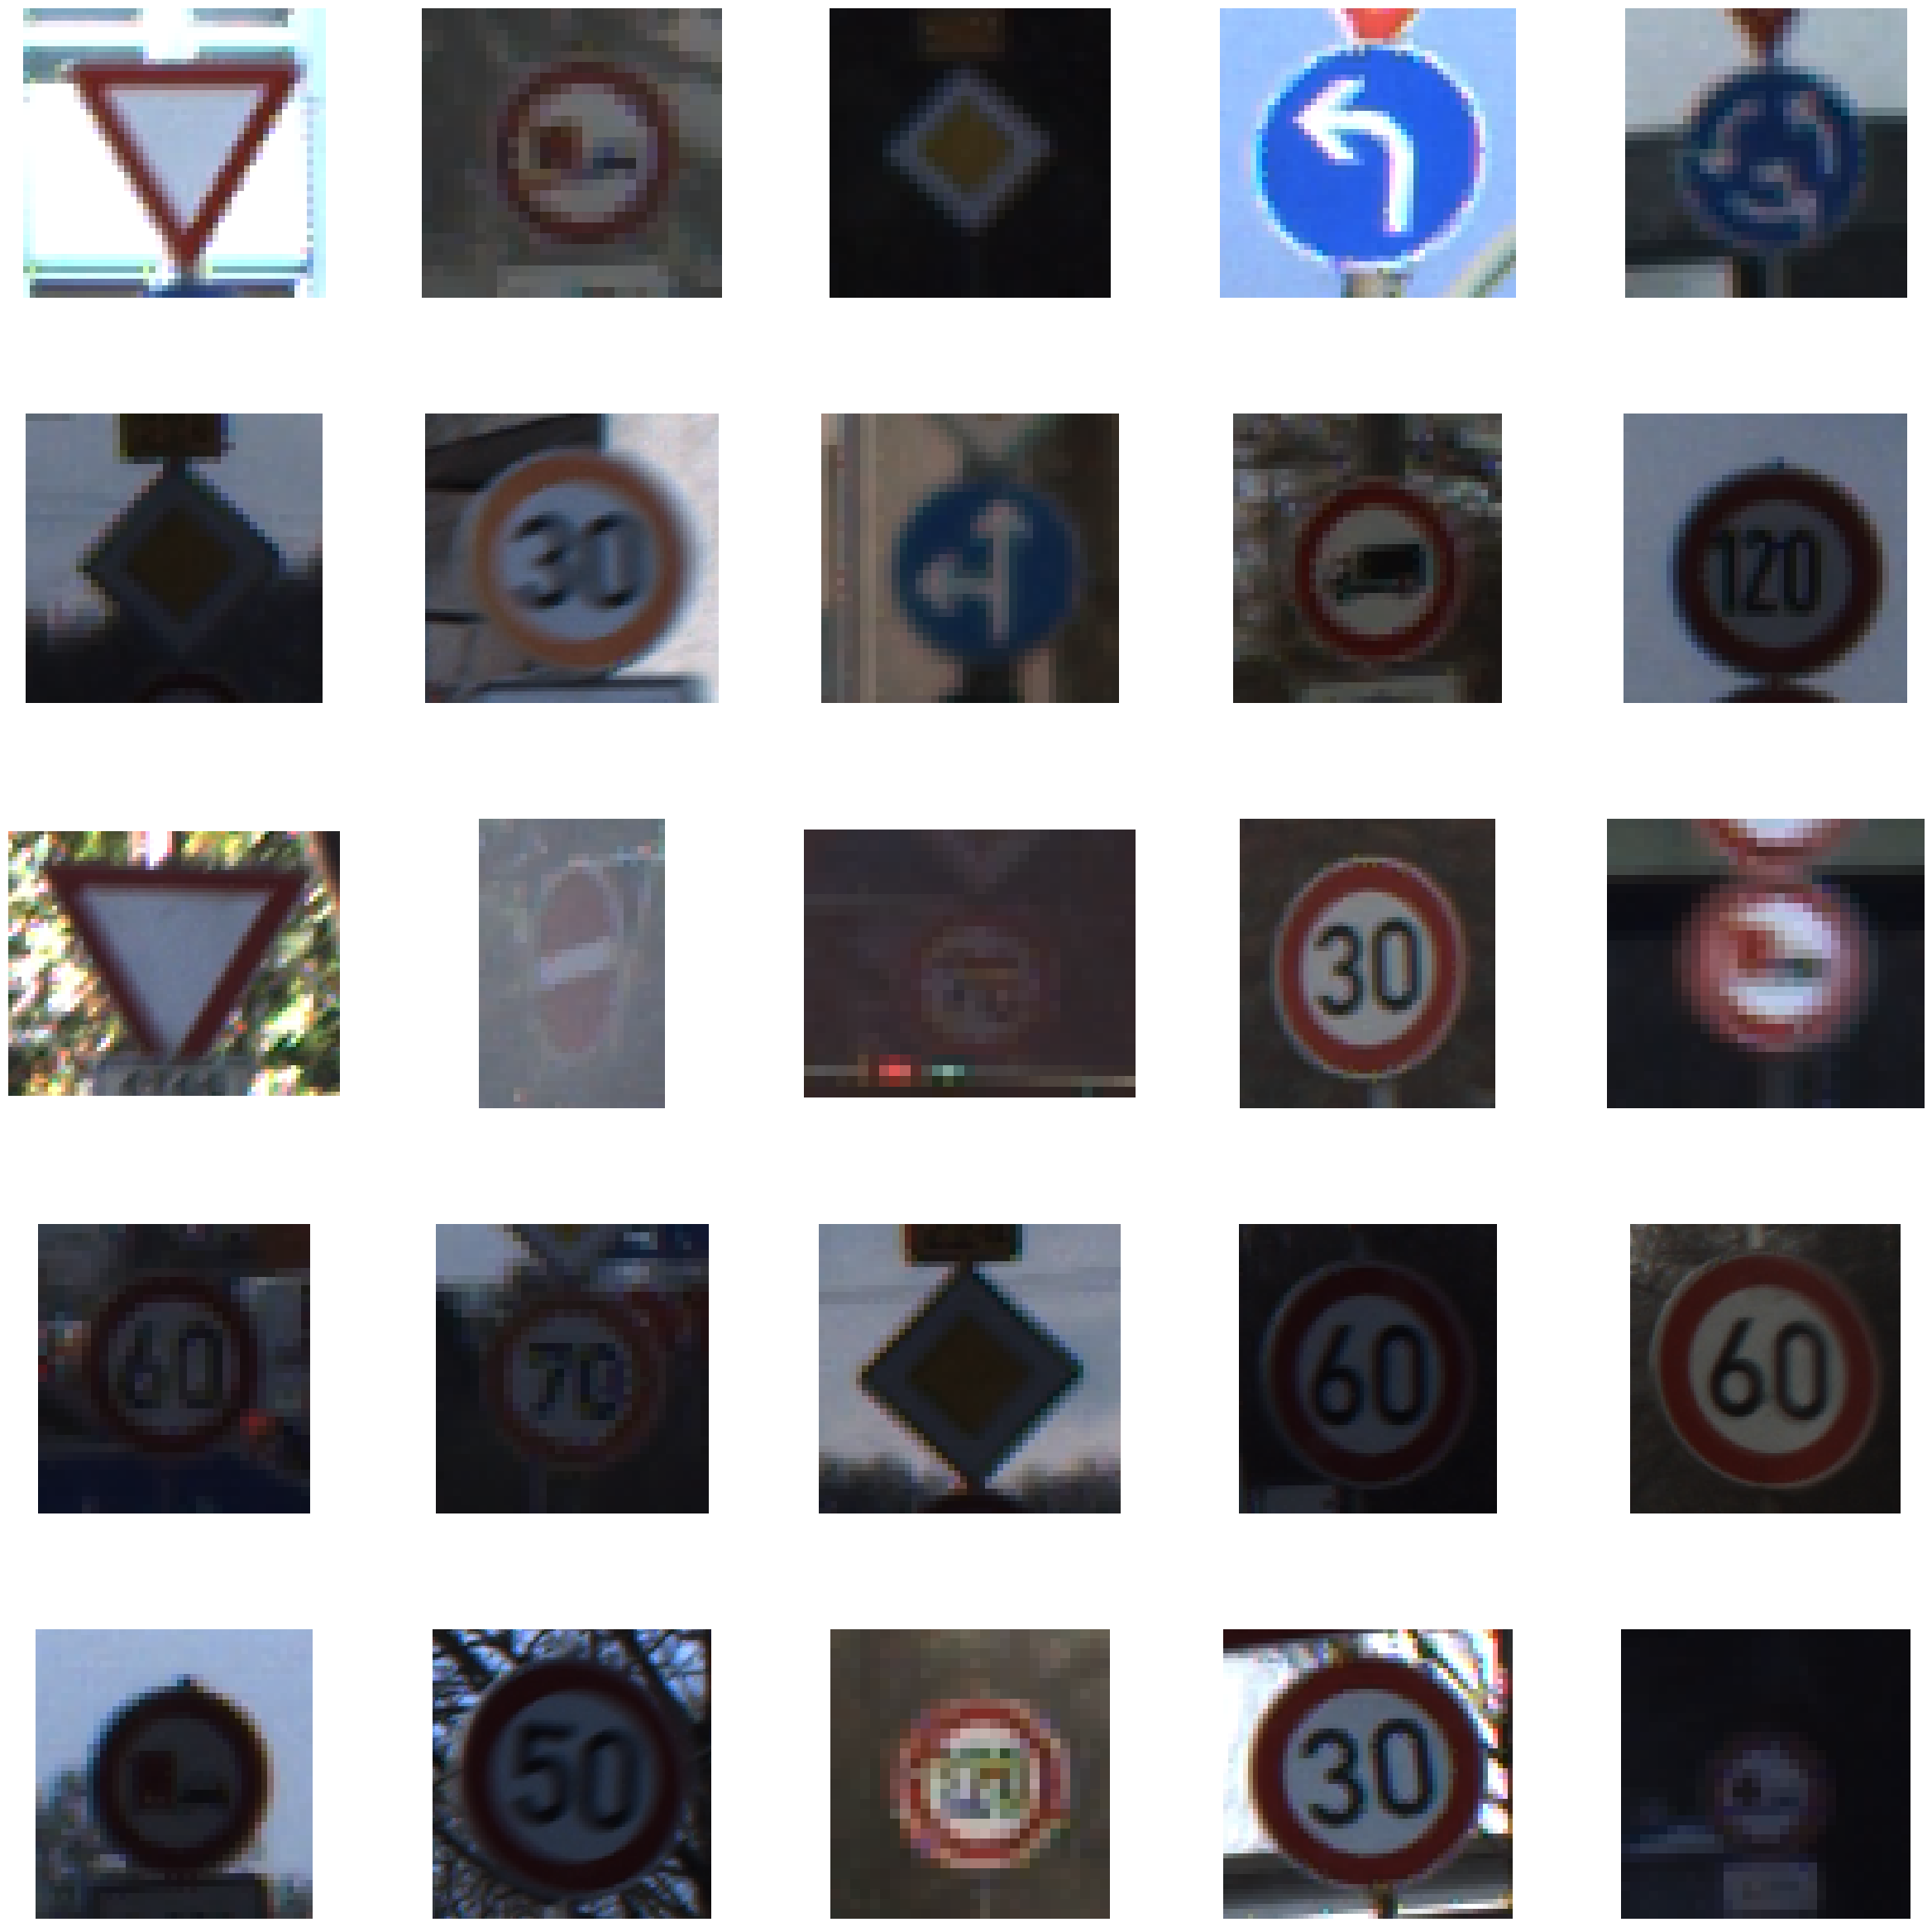

In [13]:
import random
import os
from matplotlib import pyplot as plt
from matplotlib.image import imread

data_dir = os.getcwd()
imgs = test_data['path'].values
plt.figure(figsize=(30, 30))  # Increase the figure size

for i in range(1, 26):
    plt.subplot(5, 5, i)
    random_image_path = data_dir + '/' + random.choice(imgs)
    random_image = imread(random_image_path)
    plt.imshow(random_image)
    plt.axis('off')
    plt.xlabel(random_image.shape[0], fontsize=20)
    plt.ylabel(random_image.shape[0], fontsize=20)

plt.subplots_adjust(wspace=0.2, hspace=0.4)  # Adjust spacing between subplots
plt.show()

In [14]:
cd/Users/RAVIKIRAN/archive (2)/Train

C:\Users\RAVIKIRAN\archive (2)\Train


Text(0, 0.5, 'Number of images')

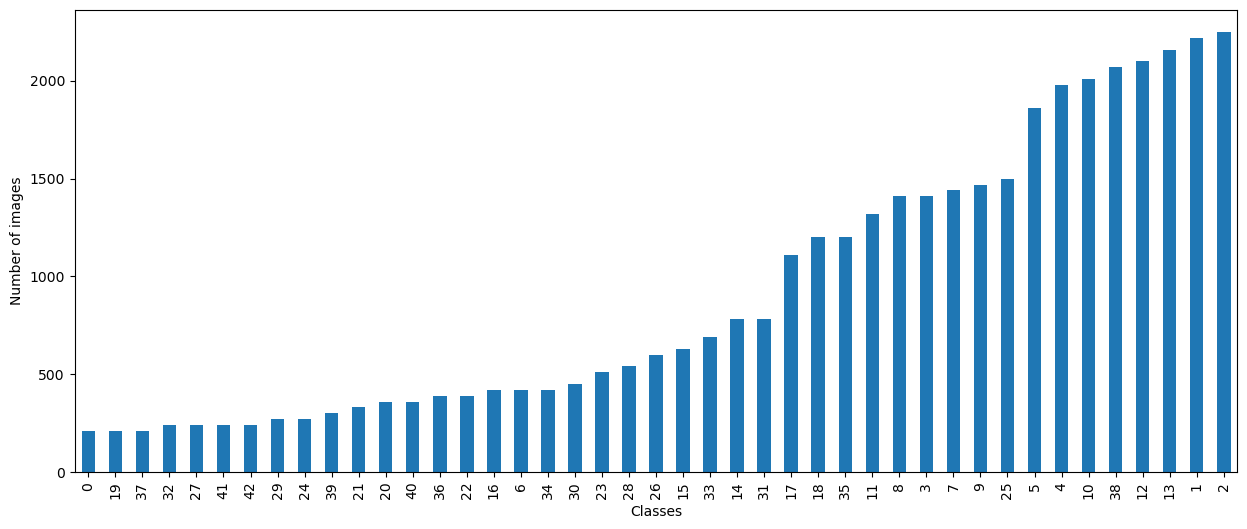

In [15]:
# number of images in each class
data_dic = {}
for folder in os.listdir(cur_path):
    data_dic[folder] = len(os.listdir(cur_path + '/' + folder))

data_df= pd.Series(data_dic)
plt.figure(figsize = (15, 6))
data_df.sort_values().plot(kind = 'bar')
plt.xlabel('Classes')
plt.ylabel('Number of images')

In [16]:
#Building the model
model = Sequential()

# First Layer
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Second Layer 
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))


# Dense Layer
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2  (None, 11, 11, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

In [18]:
import visualkeras

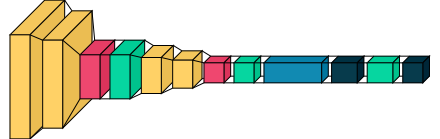

In [19]:
visualkeras.layered_view(model)

In [20]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 20
history = model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

Epoch 1/20
491/491 [==============================] - 56s 110ms/step - loss: 2.4918 - accuracy: 0.3885 - val_loss: 1.0809 - val_accuracy: 0.7589
Epoch 2/20
491/491 [==============================] - 52s 106ms/step - loss: 1.1380 - accuracy: 0.6640 - val_loss: 0.4307 - val_accuracy: 0.8754
Epoch 3/20
491/491 [==============================] - 52s 105ms/step - loss: 0.7705 - accuracy: 0.7702 - val_loss: 0.3101 - val_accuracy: 0.9232
Epoch 4/20
491/491 [==============================] - 56s 113ms/step - loss: 0.5805 - accuracy: 0.8271 - val_loss: 0.2218 - val_accuracy: 0.9389
Epoch 5/20
491/491 [==============================] - 53s 108ms/step - loss: 0.4805 - accuracy: 0.8532 - val_loss: 0.1680 - val_accuracy: 0.9508
Epoch 6/20
491/491 [==============================] - 52s 106ms/step - loss: 0.4272 - accuracy: 0.8697 - val_loss: 0.1410 - val_accuracy: 0.9588
Epoch 7/20
491/491 [==============================] - 56s 114ms/step - loss: 0.3652 - accuracy: 0.8887 - val_loss: 0.1095 - val_ac

C:\Users\RAVIKIRAN\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


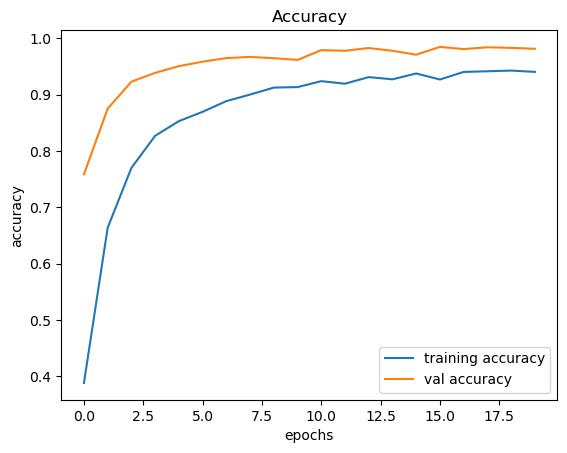

In [21]:
#plotting graphs for accuracy 
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

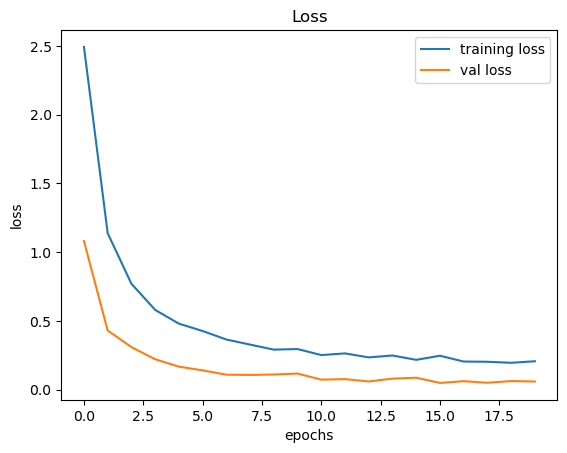

In [22]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [23]:
# Score
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss', score[0])
print('Test accuracy', score[1])

Test Loss 0.05999041721224785
Test accuracy 0.9816373586654663


In [24]:
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

246/246 [==============================] - 4s 14ms/step


In [25]:
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91        38
           1       0.98      0.97      0.97       496
           2       0.99      0.98      0.98       420
           3       0.98      0.98      0.98       294
           4       0.96      0.99      0.98       400
           5       0.94      0.96      0.95       364
           6       1.00      1.00      1.00        69
           7       0.98      0.98      0.98       313
           8       0.98      0.97      0.98       274
           9       0.98      0.99      0.98       277
          10       1.00      0.98      0.99       398
          11       1.00      0.95      0.97       261
          12       1.00      1.00      1.00       443
          13       1.00      1.00      1.00       422
          14       1.00      0.97      0.98       135
          15       1.00      1.00      1.00       118
          16       0.99      0.99      0.99        86
          17       1.00    

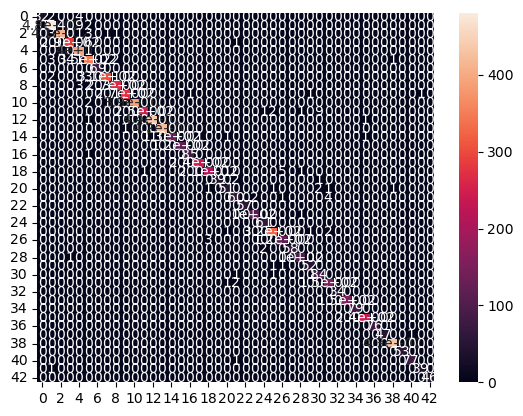

In [26]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_class, y_pred_class)
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.savefig('h1.png')

In [27]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred_class,y_test_class)
score

0.981637337413925

In [28]:
model.save('traffic_classifier.h5')

C:\Users\RAVIKIRAN\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [30]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy
from keras.models import load_model
import pyttsx3

# Load the trained model to classify sign
model = load_model('traffic_classifier.h5')

# Dictionary to label all traffic signs class.
classes = {1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing vehicle over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Vehicle > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons'}  # Your classes dictionary here

# Initialize GUI
top = tk.Tk()
top.geometry('800x600')
top.title('Traffic sign classification')
top.configure(background='#CDCDCD')

label = Label(top, background='#CDCDCD', font=('arial', 15, 'bold'))
sign_image = Label(top)

# Initialize text-to-speech engine
engine = pyttsx3.init()
speech_rate = 160 
engine.setProperty('rate', speech_rate)

def classify(file_path):
    global label_packed, pred  # Declare pred as a global variable
    image = Image.open(file_path)
    image = image.resize((30, 30))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    pred_probs = model.predict(image)
    pred = numpy.argmax(pred_probs, axis=1)[0]
    sign = classes[pred + 1]
    print(sign)
    label.configure(foreground='#011638', text=sign)

    # Convert the predicted sign to speech
    speech_text = f"Sign ahead: {sign}"  # Add a space after the colon
    engine.say(speech_text)
    engine.runAndWait()

    # No need to call the undefined "speak" function here

def upload_image():
    try:
        file_path = filedialog.askopenfilename()
        uploaded = Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width() / 4.25), (top.winfo_height() / 4.25)))
        im = ImageTk.PhotoImage(uploaded)

        sign_image.configure(image=im)
        sign_image.image = im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass

def show_classify_button(file_path):
    classify_b = Button(top, text="Know Your Traffic Sign", command=lambda: classify(file_path), padx=10, pady=5)
    classify_b.configure(background='#364156', foreground='white', font=('arial', 10, 'bold'))
    classify_b.place(relx=0.72, rely=0.46)  # Adjust relx to position the button

upload = Button(top, text="Upload an image", command=upload_image, padx=30, pady=10)
upload.configure(background='#364156', foreground='white', font=('arial', 10, 'bold'))
upload.pack(side=BOTTOM, pady=50)

sign_image.pack(side=BOTTOM, expand=True)
label.pack(side=BOTTOM, expand=True)
heading = Label(top, text="Traffic Sign Recognition", pady=20, font=('arial', 20, 'bold'))
heading.configure(background='#CDCDCD', foreground='#364156')
heading.pack()

top.mainloop()


1/1 [==============================] - 0s 162ms/step
Speed limit (50km/h)
1/1 [==============================] - 0s 36ms/step
Speed limit (30km/h)
1/1 [==============================] - 0s 37ms/step
Speed limit (50km/h)
